In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import csv
import random
import datetime
import collections
import fairness_goodness_computation as fair_good

In [3]:
def genRandGNp(N,p):
    # generate random (undirected) network with N nodes 0,...,N-1 where p is 
    # the probability that a pair of nodes is connected
    #G = nx.gnp_random_graph(N, p)
    G = nx.Graph()
    G.add_nodes_from(range(N))
    for i in range(N):
        for j in range(i+1,N):
            r = random.random()
            if(r < p):
                G.add_edge(i,j)
    return G

G = genRandGNp(5,1)
nx.write_edgelist(G, "test.edgelist")

In [4]:
edges = []
with open('soc-sign-bitcoinotc.csv') as btc_file:
    csv_reader = csv.reader(btc_file, delimiter=',')
    line_count = 0
    with open('btc.edgelist', 'w') as el:
        for row in csv_reader:
            trans_time = datetime.datetime.fromtimestamp(float(row[3]))
            edge = str(row[0]) + " " + str(row[1]) + " {\'weight\':" + str(int(row[2])/10) + ", \'time\':" + str(row[3])  + "}\n"
            el.write(edge)
            edges.append(row)

In [5]:
G = nx.read_edgelist("btc.edgelist", create_using=nx.DiGraph())
fairness, goodness = fair_good.compute_fairness_goodness(G)
for n, fair in fairness.items():
    G.nodes[n]['fairness'] = fair
for n, good in goodness.items():
    G.nodes[n]['goodness'] = good

-----------------
Iteration number 0
Updating goodness
Updating fairness
Differences in fairness score and goodness score = 382.21, 0.00
-----------------
Iteration number 1
Updating goodness
Updating fairness
Differences in fairness score and goodness score = 34.47, 102.29
-----------------
Iteration number 2
Updating goodness
Updating fairness
Differences in fairness score and goodness score = 2.39, 6.97
-----------------
Iteration number 3
Updating goodness
Updating fairness
Differences in fairness score and goodness score = 0.39, 1.06
-----------------
Iteration number 4
Updating goodness
Updating fairness
Differences in fairness score and goodness score = 0.10, 0.24
-----------------
Iteration number 5
Updating goodness
Updating fairness
Differences in fairness score and goodness score = 0.03, 0.06
-----------------
Iteration number 6
Updating goodness
Updating fairness
Differences in fairness score and goodness score = 0.01, 0.02
-----------------
Iteration number 7
Updating good

In [6]:
print(len(G.nodes()))
print(len(G.edges()))
print(list(G.nodes.data())[:10])

5881
35592
[('6', {'fairness': 0.895725519589204, 'goodness': 0.13017598697577548}), ('2', {'fairness': 0.8937438727755906, 'goodness': 0.26953118901348677}), ('5', {'fairness': 0.9401114372757616, 'goodness': 0.214168037653604}), ('1', {'fairness': 0.9224364178283305, 'goodness': 0.32393301972054966}), ('15', {'fairness': 0.9604893190993837, 'goodness': 0.14446543772976078}), ('4', {'fairness': 0.8912871984696537, 'goodness': 0.28660008488434285}), ('3', {'fairness': 1, 'goodness': -0.035795527962606544}), ('13', {'fairness': 0.9455630055117719, 'goodness': 0.16737286339010946}), ('16', {'fairness': 1, 'goodness': 0.7564504044145364}), ('10', {'fairness': 0.713045549965856, 'goodness': 0.5520617033189419})]


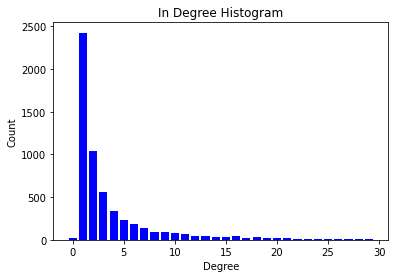

In [7]:
degree_seq = sorted([d for _, d in G.in_degree()], reverse=True)
degreeCount = collections.Counter(degree_seq)
deg, cnt = zip(*degreeCount.items())
deg_small = deg[-30:]
cnt_small = cnt[-30:]
plt.bar(deg_small, cnt_small, width=0.80, color="b")
plt.title("In Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()

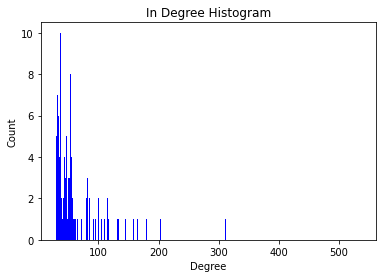

In [8]:
degree_seq = sorted([d for _, d in G.in_degree()], reverse=True)
degreeCount = collections.Counter(degree_seq)
deg, cnt = zip(*degreeCount.items())
deg_high = deg[:-30]
cnt_high = cnt[:-30]
plt.bar(deg_high, cnt_high, width=0.80, color="b")
plt.title("In Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()

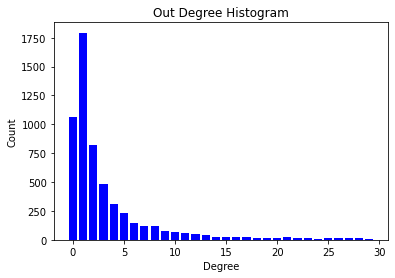

In [9]:
degree_seq = sorted([d for _, d in G.out_degree()], reverse=True)
degreeCount = collections.Counter(degree_seq)
deg, cnt = zip(*degreeCount.items())
deg_small = deg[-30:]
cnt_small = cnt[-30:]
plt.bar(deg_small, cnt_small, width=0.80, color="b")
plt.title("Out Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()

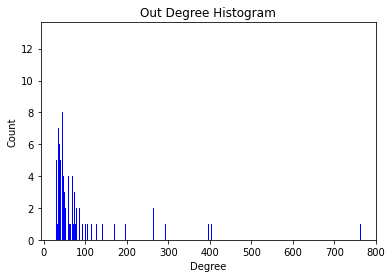

In [10]:
degree_seq = sorted([d for _, d in G.out_degree()], reverse=True)
degreeCount = collections.Counter(degree_seq)
deg, cnt = zip(*degreeCount.items())
deg_high = deg[:-30]
cnt_high = cnt[:-30]
plt.bar(deg_high, cnt_high, width=0.80, color="b")
plt.title("Out Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()

In [11]:
import numpy as np

fsum, gsum = 0,0
fs, gs = [], []
for node in G.nodes():
    fsum+= G.nodes[node]["fairness"]
    fs.append(G.nodes[node]["fairness"])
    gsum+= G.nodes[node]['goodness']
    gs.append(G.nodes[node]['goodness'])
favg = fsum/len(G.nodes())
gavg = gsum/len(G.nodes())
fs = np.array(fs)
gs = np.array(gs)
print(favg, np.median(fs))
print(gavg, np.median(gs))

0.9361968968021371 0.9634176036364297
0.07011733635533969 0.0975315212085448


In [33]:
fa, go = [], []
for node in G.nodes():
    fa.append((node, G.nodes[node]["fairness"]))
    go.append((node, G.nodes[node]["goodness"]))
fa_sorted = sorted(fa, key=lambda x: x[1], reverse=False)
print(fa_sorted[:10])
for n in fa_sorted[:10]:
    print(n[0], G.out_degree[n[0]], G.out_edges(n[0], data=True))
go_sorted = sorted(go, key=lambda x: x[1], reverse=False)
print(go_sorted[:20])
n = 0
i = 0
#while n < 20:
#    if G.in_degree[go_sorted[i][0]] > 30:
#        print(go_sorted[i], G.in_degree[go_sorted[i][0]], "\n")
#        n+=1
#    i+=1
for n in go_sorted[:20]:
    print(n[0], G.in_degree[n[0]],G.in_edges(n[0], data=True))


[('5129', 0.3199615714769132), ('5237', 0.32034796466954996), ('2720', 0.34199150984295984), ('1572', 0.36429562972734464), ('2631', 0.3860194480813071), ('5201', 0.3933879789923556), ('5202', 0.3933879789923556), ('4742', 0.3957305463444247), ('5200', 0.4110803529196937), ('2685', 0.4117246163926509)]
5129 1 [('5129', '5080', {'weight': 1.0, 'time': 1386330175.47091})]
5237 1 [('5237', '5239', {'weight': 1.0, 'time': 1387912961.75223})]
2720 3 [('2720', '2574', {'weight': 1.0, 'time': 1349057608.90791}), ('2720', '2721', {'weight': 1.0, 'time': 1349057615.36096}), ('2720', '2700', {'weight': 1.0, 'time': 1349057629.32249})]
1572 1 [('1572', '1600', {'weight': 1.0, 'time': 1322049770.26418})]
2631 6 [('2631', '1810', {'weight': -1.0, 'time': 1348580145.89337}), ('2631', '2634', {'weight': 1.0, 'time': 1348580179.65473}), ('2631', '2574', {'weight': 1.0, 'time': 1348580219.68577}), ('2631', '2666', {'weight': 1.0, 'time': 1348580228.06061}), ('2631', '2570', {'weight': 1.0, 'time': 1348

In [13]:
ind = nx.in_degree_centrality(G)
ind_sorted = sorted(ind.items(), key=lambda x: x[1], reverse=True)
print(ind_sorted[:5])
for node in ind_sorted[:5]:
    print(node[0], G.nodes[node[0]]['goodness'])
outd = nx.out_degree_centrality(G)
outd_sorted = sorted(outd.items(), key=lambda x: x[1], reverse=True)
print(outd_sorted[:5])
for node in outd_sorted[:5]:
    print(node[0], G.nodes[node[0]]['fairness'])

[('35', 0.09098639455782312), ('2642', 0.07006802721088434), ('1810', 0.05289115646258503), ('2028', 0.047448979591836735), ('905', 0.044897959183673466)]
35 0.17316479272714067
2642 0.23008719101752148
1810 0.10346163165058063
2028 0.07597495559793728
905 0.07936650296381802
[('35', 0.12976190476190474), ('2642', 0.06904761904761904), ('1810', 0.06870748299319727), ('2125', 0.06751700680272109), ('2028', 0.049829931972789114)]
35 0.9830143667602695
2642 0.9491512107433073
1810 0.8708050249989743
2125 0.9318230777051612
2028 0.9191858878075655


In [14]:
ind = nx.eigenvector_centrality(G)
ind_sorted = sorted(ind.items(), key=lambda x: x[1], reverse=True)
print(ind_sorted[:5])
for node in ind_sorted[:5]:
    print(node[0], G.nodes[node[0]]['goodness'])
print()
for node in ind_sorted[:5]:
    print(node[0], G.nodes[node[0]]['fairness'])

[('2642', 0.20219528408234008), ('905', 0.19013079597190816), ('1810', 0.16982028934934615), ('35', 0.15477259487183825), ('2028', 0.15009176951724965)]
2642 0.23008719101752148
905 0.07936650296381802
1810 0.10346163165058063
35 0.17316479272714067
2028 0.07597495559793728

2642 0.9491512107433073
905 0.9071131116037693
1810 0.8708050249989743
35 0.9830143667602695
2028 0.9191858878075655


In [15]:
ind = nx.closeness_centrality(G)
ind_sorted = sorted(ind.items(), key=lambda x: x[1], reverse=True)
print(ind_sorted[:5])
for node in ind_sorted[:5]:
    print(node[0], G.nodes[node[0]]['goodness'])
print()
for node in ind_sorted[:5]:
    print(node[0], G.nodes[node[0]]['fairness'])

[('905', 0.3393980425132191), ('35', 0.331224398123012), ('1', 0.3309941813389126), ('2642', 0.32729751092877013), ('13', 0.32073943653905407)]
905 0.07936650296381802
35 0.17316479272714067
1 0.32393301972054966
2642 0.23008719101752148
13 0.16737286339010946

905 0.9071131116037693
35 0.9830143667602695
1 0.9224364178283305
2642 0.9491512107433073
13 0.9455630055117719


In [17]:
ind = nx.betweenness_centrality(G)
ind_sorted = sorted(ind.items(), key=lambda x: x[1], reverse=True)
print(ind_sorted[:5])
for node in ind_sorted[:5]:
    print(node[0], G.nodes[node[0]]['goodness'])
print()
for node in ind_sorted[:5]:
    print(node[0], G.nodes[node[0]]['fairness'])

[('35', 0.14211022254570446), ('2642', 0.06220168253637525), ('1810', 0.049533487572168064), ('905', 0.048142532048893405), ('1', 0.044997192103169)]
35 0.17316479272714067
2642 0.23008719101752148
1810 0.10346163165058063
905 0.07936650296381802
1 0.32393301972054966

35 0.9830143667602695
2642 0.9491512107433073
1810 0.8708050249989743
905 0.9071131116037693
1 0.9224364178283305


In [18]:
from networkx.algorithms import community

#c = list(community.greedy_modularity_communities(G))
#c = list(community.label_propagation_communities(G)) # Not implemented for directed graph
print('Number of communities:' + str(len(c)))
print('  communities size:')
for com in c:
    print('    ' + str(len(com)))


NameError: name 'c' is not defined